In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_themplate import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib_themplate import *
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
RANDOM_STATE = 55
from sklearn.metrics import accuracy_score




In [58]:
df_train = pd.read_csv("DataSet/Titanic_data/train.csv")
df_test = pd.read_csv("DataSet/Titanic_data/test.csv")

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [62]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


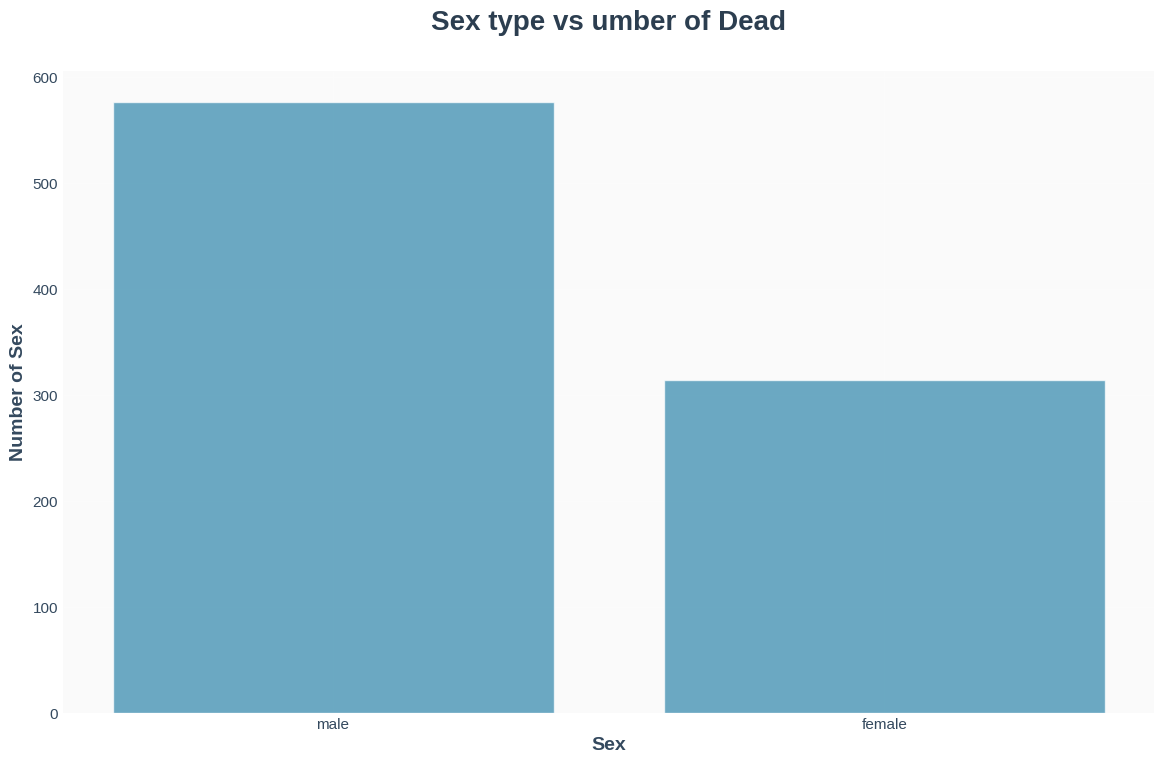

In [63]:

fig, ax = create_modern_plot(df_train['Sex'].unique(), df_train['Sex'].value_counts(),
                           title="Sex type vs umber of Dead",
                           x_label="Sex",
                            y_label="Number of Sex",
                           plot_type="bar",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

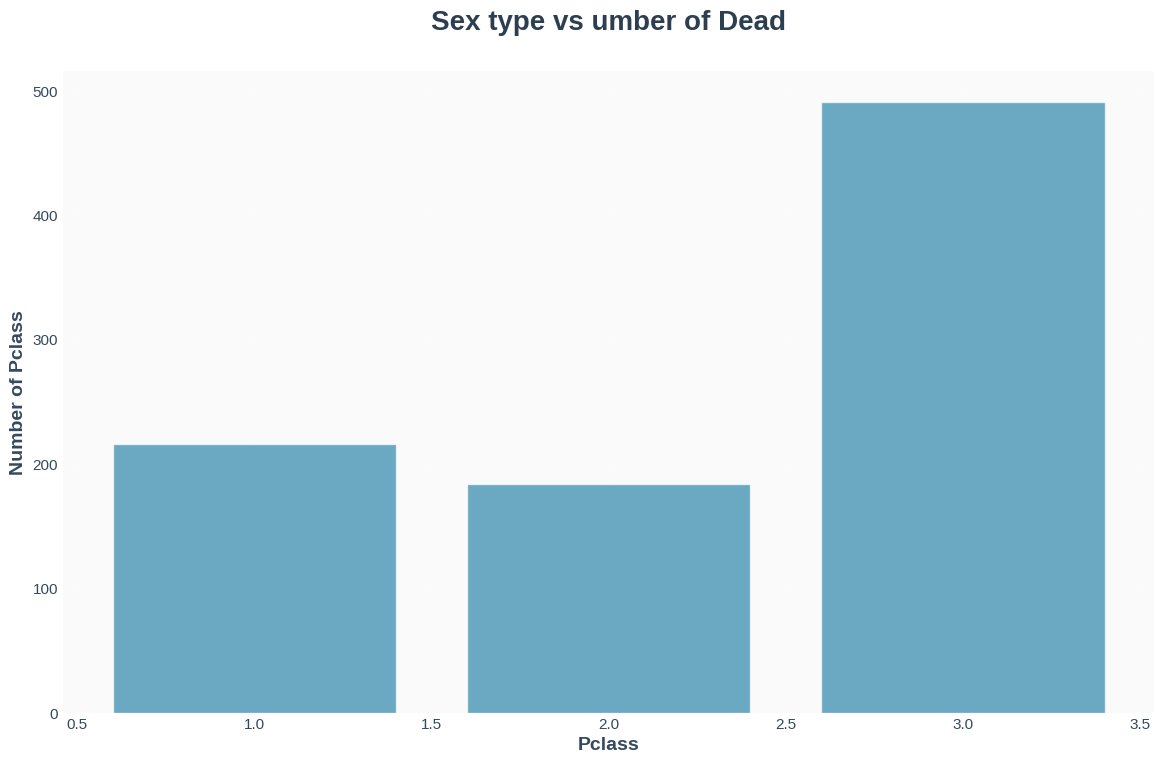

In [64]:
fig, ax = create_modern_plot(df_train['Pclass'].unique(), df_train['Pclass'].value_counts(),
                           title="Sex type vs umber of Dead",
                           x_label="Pclass",
                            y_label="Number of Pclass",
                           plot_type="bar",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

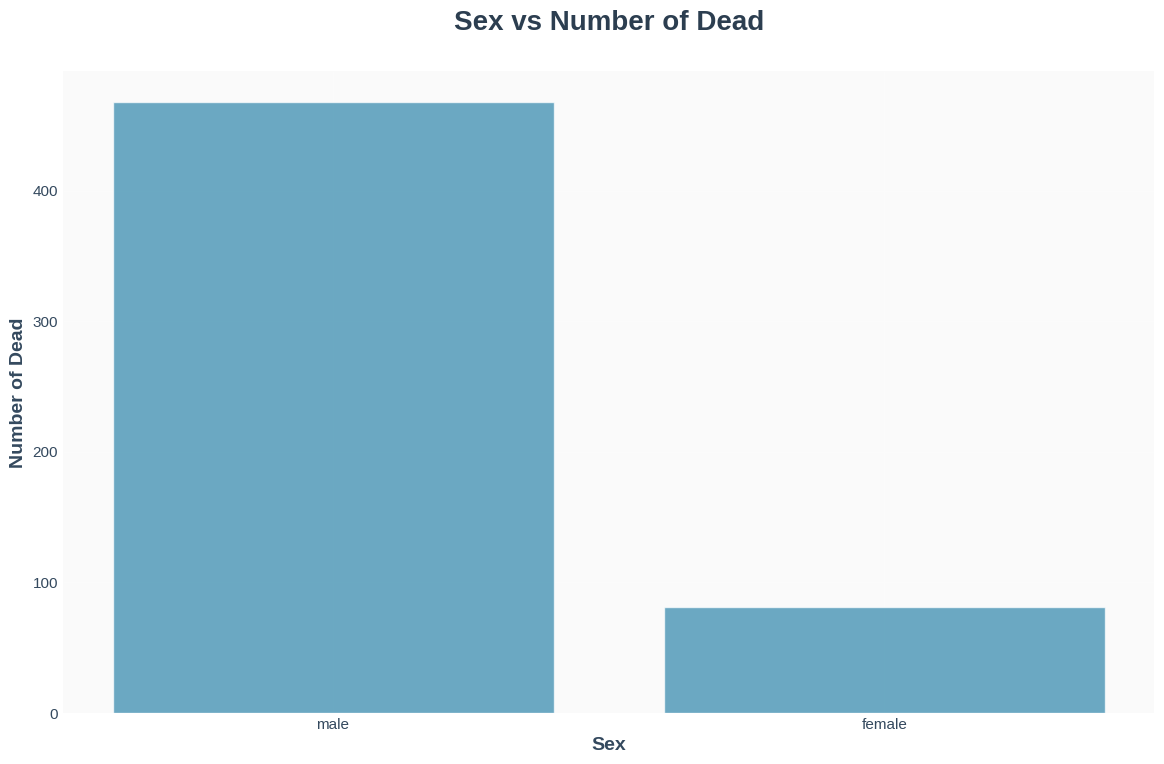

In [65]:
# นับจำนวนผู้เสียชีวิต (Survived = 0) ในแต่ละเพศ
dead_by_sex = df_train[df_train['Survived'] == 0]['Sex'].value_counts()

# สร้างกราฟ
fig, ax = create_modern_plot(
    dead_by_sex.index,             # ['male', 'female']
    dead_by_sex.values,            # [จำนวนที่ตายของแต่ละเพศ]
    title="Sex vs Number of Dead",
    x_label="Sex",
    y_label="Number of Dead",
    plot_type="bar",
    color_scheme="modern"
)

In [66]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df_train.duplicated().sum()

np.int64(0)

In [68]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
#feature [Pclass,Sex,Age,SibSp,Parch]
#Y_label [Survived] Dead = 0

In [70]:
# Encode categorical variables
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    label_encoders[col] = le

In [71]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [72]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [73]:
y_ = df_train["Survived"].to_numpy()
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('Fare', axis=1, inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)
df_train.drop('Embarked', axis=1, inplace=True)
df_train.drop('Survived', axis=1, inplace=True)
df_train.dtypes


Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
dtype: object

In [74]:
X_ = df_train.to_numpy()
X_

array([[ 3.,  1., 22.,  1.,  0.],
       [ 1.,  0., 38.,  1.,  0.],
       [ 3.,  0., 26.,  0.,  0.],
       ...,
       [ 3.,  0., 28.,  1.,  2.],
       [ 1.,  1., 26.,  0.,  0.],
       [ 3.,  1., 32.,  0.,  0.]])

In [75]:
y_

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [76]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
       incorrect+=int((y[i]!=yhat[i]))
    cerr=incorrect/m
    return(cerr)

In [77]:
# split the data. Large CV population for demonstration
X_train, X_cv, y_train, y_cv = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape)

X_train.shape: (712, 5) X_cv.shape: (179, 5)


In [78]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ###    
    Dense(units=6,activation='relu'),
    Dense(units=4,activation='linear')    
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.05),
    ### START CODE HERE ### 
)

In [79]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
model_s.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1213  
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5782 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5058 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4906 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4792 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.4773
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.5262
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5968 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4765 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4739 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4918 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4695 
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4673 
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4732 
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [80]:
model_s.summary()


Model: "Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 6)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194 (780.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130 (524.00 B)

In [81]:
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}" )

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
categorization error, training, simple model, 0.180
categorization error, cv,       simple model, 0.246


In [82]:
#Complex Model

model = Sequential([
    Dense(120, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(40, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4, activation='linear')  # For 4-class classification
], name="Complex")

In [83]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']  # Optional, but good for monitoring
)

In [84]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=100,
    verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2945 - loss: 1.8699 - val_accuracy: 0.2123 - val_loss: 2.0012
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3930 - loss: 1.6446 - val_accuracy: 0.3184 - val_loss: 1.5467
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4587 - loss: 1.5123 - val_accuracy: 0.5531 - val_loss: 1.3620
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5006 - loss: 1.3959 - val_accuracy: 0.5419 - val_loss: 1.2747
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5830 - loss: 1.3113 - val_accuracy: 0.6816 - val_loss: 1.1557
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 1.1760 - val_accuracy: 0.6872 - val_loss: 1.0993
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 1.1896 - val_accuracy: 0.7207 - val_loss: 0.9810
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6558 - loss: 1.0686 - val_accuracy: 0.7374 - v

In [85]:
model.summary()

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 120)            │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,454 (72.09 KB)

 Trainable params: 6,044 (23.61 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 12,090 (47.23 KB)

In [86]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
categorization error, training, complex model: 0.164
categorization error, cv,       complex model: 0.229


In [87]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 800] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

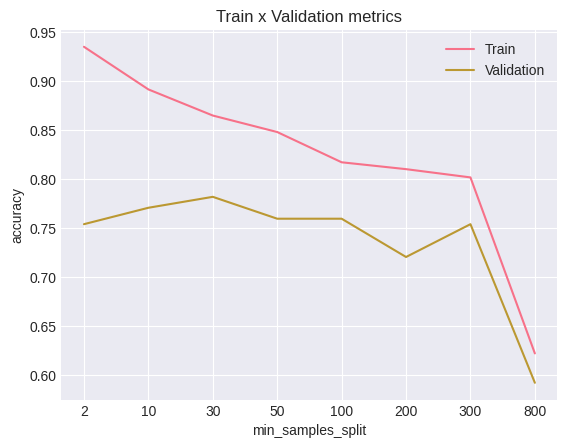

In [88]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

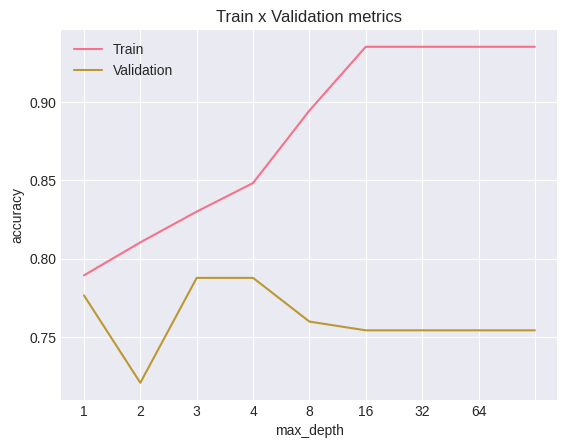

In [89]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [90]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 300,
                                             max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [91]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_cv),y_cv):.4f}")

Metrics train:
	Accuracy score: 0.8020
Metrics validation:
	Accuracy score: 0.7542


In [92]:
#Ramdom forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

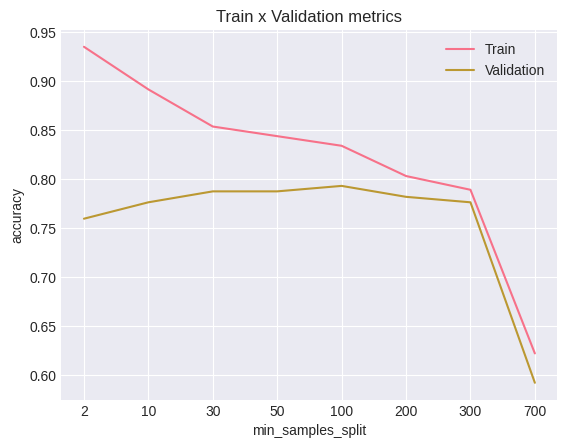

In [93]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

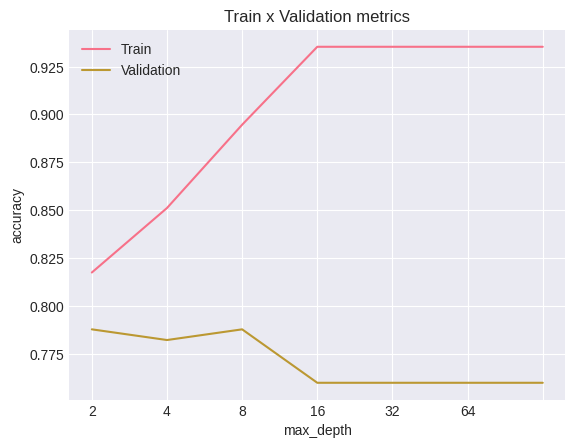

In [94]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

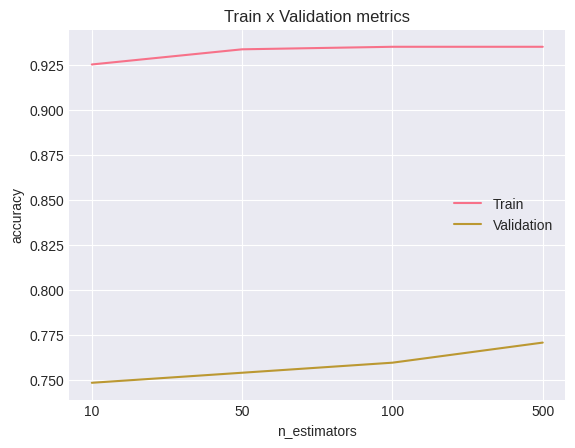

In [95]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [96]:
random_forest_model = RandomForestClassifier(n_estimators = 400,
                                             max_depth = 2, 
                                             min_samples_split = 100).fit(X_train,y_train)

In [97]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_cv),y_cv):.4f}")

Metrics train:
	Accuracy score: 0.8216
Metrics test:
	Accuracy score: 0.7877


In [98]:
#Regularixation
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
    Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),    
    Dense(units=40,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(units=14,activation='linear')    
        
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    ### START CODE HERE ### 
)

In [99]:
model_r.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3288    
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8083 
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5182 
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5864 
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9209 
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4462 
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1068 
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8751 
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6814 
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5534 
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4450 
Epoch 12/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3707 
Epoch 13/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3026 
Epoch 14/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2510 
Epoch 15/1000
23/23 ━━━━━━━━━━━━━━━━━━━━

In [100]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)

In [101]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}" )

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
categorization error, training, regularized: 0.169
categorization error, cv,       regularized: 0.251
